# Ensemble Basics I : Bagging

**실습 목표**

1. 배깅의 원리를 이해한다.
    * Bootstrap sampling을 이해한다.
    * Aggregation을 이해한다.
2. Decision Tree algorithm More!
2. 트리구조 머신러닝에 배깅 적용 전후를 비교한다.
    * Decision Tree   VS   Random Forest
3. 배깅의 원리를, 다른 머신러닝 알고리즘에 적용해본다.


**실습 데이터**
* Fashion MNIST 
* MNIST (H.W maybe)


Q. 앙상블의 영역에 온다는 것은 어디에 더 무게추가 기울어져 있을까?

'설명과 해석'   &   '예측 정확도'

---------------------------
Rayleigh Kim<br>
biz.rayleigh@gmail.com

## 1. Bagging = Bootstrap + Aggregating

### Bootstrap 이해하기

우리 다시, 평균 예측을 해보아요.<br>
데이터 전체를 다 수집하기 전에는 모르는 정보는 다음과 같습니다.

* 20대의 월 평균 식비는 150만원 (우리가 찾아야 하는 정답)

20대 전체는 10만명이고, 데이터를 전체 수집할 수도 없습니다만.
실험을 여러번 해볼 수는 있겠습니다. (어느정도 예산이 있음!)

In [0]:
import numpy as np
np.random.seed(2019)

# 20대의 식비 데이터

sickbee1 = np.random.normal(100, 20, 50000)
sickbee2 = np.random.normal(200, 40, 50000)

sickbee = np.concatenate((sickbee1, sickbee2) )

**Bootstrap 절차**

1. 샘플사이즈 m 선택. 복원 추출한다.
2. 위와 같은 샘플셋을 n개 만든다.
3. n개의 추정치를 가지고 최종 추정치를 만든다!

In [0]:
# 샘플사이즈 m : 100개 씩 해보자!
# 반복 실행해보자!
first_sample_set = np.random.choice(sickbee, 100, replace = True)
print("처음뽑은 샘플의 평균은 : ",first_sample_set.mean())
print("처음뽑은 샘플의 표준편차는 : ",first_sample_set.std())

** Practice 01 **

1. 샘플셋들의 평균을 담을 빈 리스트(boots)를 만드시오.
2. 루프를 이용하여..
    1. 총 1000개의 샘플셋을 샘플링 하시오. (저장할 필요 없음)
    2. 1000개의 샘플셋에서 평균을 구해 리스트에 담으시오.
3. boots를 넘파이 어레이로 바꾸시오.
4. boots에 담긴 데이터의 평균과 표준편차를 구하시오.


In [0]:
### 코드를 작성 하시오!

boots = []

for i in range(1000) :
    sample_set = np.random.choice(sickbee, 100, replace = True)
    boots.append(sample_set.mean())
    
boots = np.array(boots)

In [0]:
print("부트스트랩한 데이터의 평균은 : ", boots.mean())
print("부트스트랩한 데이터의 표준편차는 : ", boots.std())

**Discussion 01**

1. 여러번 반복 실행해보세요.
    * 샘플셋을 100개로도 줄여보고 10000개로도 늘려보세요.
    * 위의 단순 샘플링의 샘플사이즈를 100개에서 100000개로 늘려보세요.
2. 예측의 안정성은 어떤가요?

### Aggregation

어려운 것 없다!

In [0]:
# 이 샘플을 가지고 진행합니다.

sample = np.array([1,0,1,0,1,1,1,0,0,1,1,1])

In [0]:
# 1. 다수결 하여 1인지 0인지 결정하시오.



In [0]:
# 2. 2번 학생은 한번에 6표를 행사 할 수 있습니다.
# 다수결 하여 1인지 0인지 결정하시오.


In [0]:
# 다음 문제는 이 샘플을 가지고 진행합니다.

sample = np.array([50,72,55,60,65,48,70])

In [0]:
# 1. 평균을 구하시오.


In [0]:
# 2. 1번 참가자(인덱스 0번)는 정확도가 매우 낮기로 소문이 나있습니다.
# 1번 참가자는 0.5표만 행사할 수 있다고 합시다.
# 평균을 구하시오.


## 2. Decision Tree Algorithm More!

[쉬운데이터](https://en.wikipedia.org/wiki/Iris_flower_data_set)로 간다!

![sepal과 petal](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

아이리스 데이터!

In [0]:
import time
from sklearn.datasets import load_iris

# 아이리스 데이터셋
iris = load_iris()

In [2]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [0]:
# 사용할 것 불러오고!
from sklearn.tree import DecisionTreeClassifier

In [0]:
# 사용할 모델 선언하고!
DT_cf_max3 = DecisionTreeClassifier(max_depth = 3)
DT_cf_max3r = DecisionTreeClassifier(max_depth = 3, splitter='random')
DT_cf_maxnon = DecisionTreeClassifier(max_depth = None)
DT_cf_maxnonr = DecisionTreeClassifier(max_depth = None, splitter='random')

In [5]:
# 학습을 시킨다!
t1 = time.clock()
DT_cf_max3.fit(iris.data, iris.target)
t2 = time.clock()
DT_cf_max3r.fit(iris.data, iris.target)
t3 = time.clock()
DT_cf_maxnon.fit(iris.data, iris.target)
t4 = time.clock()
DT_cf_maxnonr.fit(iris.data, iris.target)
t5 = time.clock()

print("depth 3 학습소요시간 : ", t2-t1)
print("depth 3 + random 학습소요시간 : ", t3-t2)
print("depth nonlimited 학습소요시간 : ", t4-t3)
print("depth nonlimited + random 학습소요시간 : ", t5-t4)

depth 3 학습소요시간 :  0.0030280000000000307
depth 3 + random 학습소요시간 :  0.0006569999999999077
depth nonlimited 학습소요시간 :  0.0006550000000000722
depth nonlimited + random 학습소요시간 :  0.0006420000000000314


In [0]:
# 시각화를 위하여..
from sklearn.tree import export_graphviz

export_graphviz(DT_cf_max3, out_file = 'tree_3.dot', feature_names = iris.feature_names,
               class_names = iris.target_names, rounded = True, proportion = False,
               precision = 3, filled = True)

export_graphviz(DT_cf_max3r, out_file = 'tree_3r.dot', feature_names = iris.feature_names,
               class_names = iris.target_names, rounded = True, proportion = False,
               precision = 3, filled = True)

export_graphviz(DT_cf_maxnon, out_file = 'tree_non.dot', feature_names = iris.feature_names,
               class_names = iris.target_names, rounded = True, proportion = False,
               precision = 3, filled = True)

export_graphviz(DT_cf_maxnonr, out_file = 'tree_nonr.dot', feature_names = iris.feature_names,
               class_names = iris.target_names, rounded = True, proportion = False,
               precision = 3, filled = True)

In [0]:
!dot -Tpng tree_3.dot -o tree_3.png -Gdpi=600
!dot -Tpng tree_3r.dot -o tree_3r.png -Gdpi=600
!dot -Tpng tree_non.dot -o tree_non.png -Gdpi=600
!dot -Tpng tree_nonr.dot -o tree_nonr.png -Gdpi=600

깊이3 나무


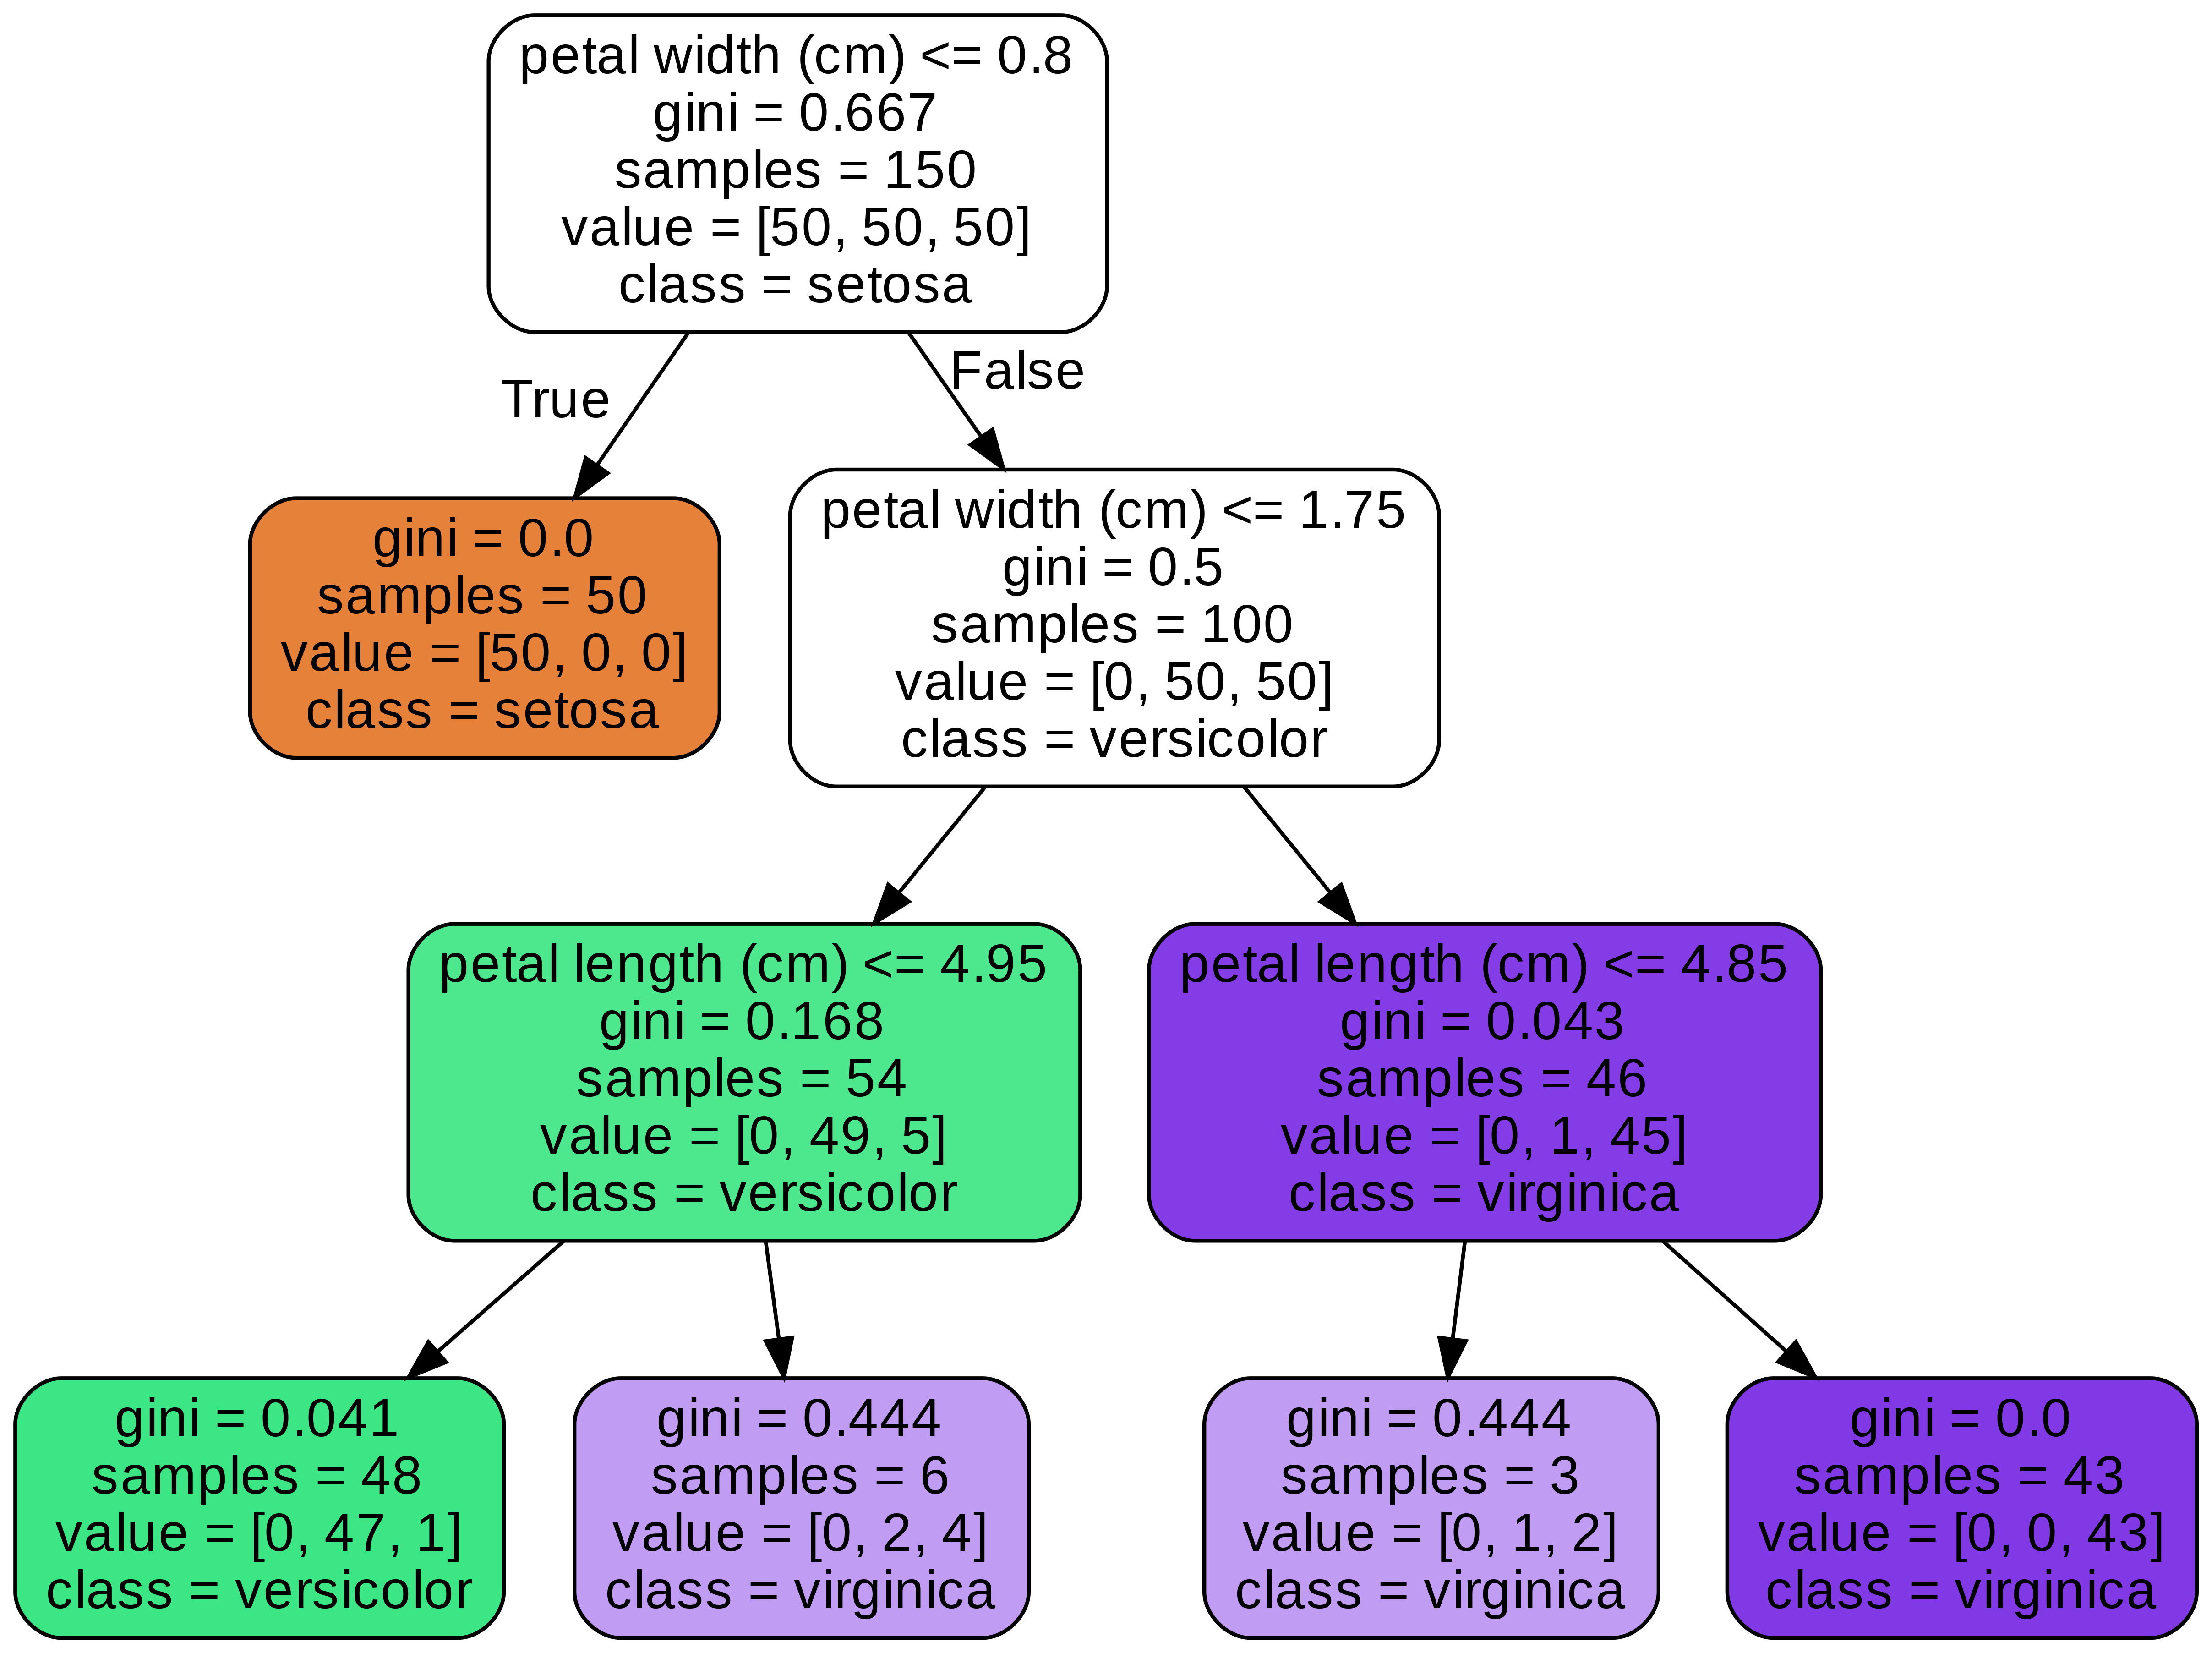

In [8]:
from IPython.display import Image
print('깊이3 나무')
Image(filename = 'tree_3.png', width = 700)

깊이3+랜덤 나무


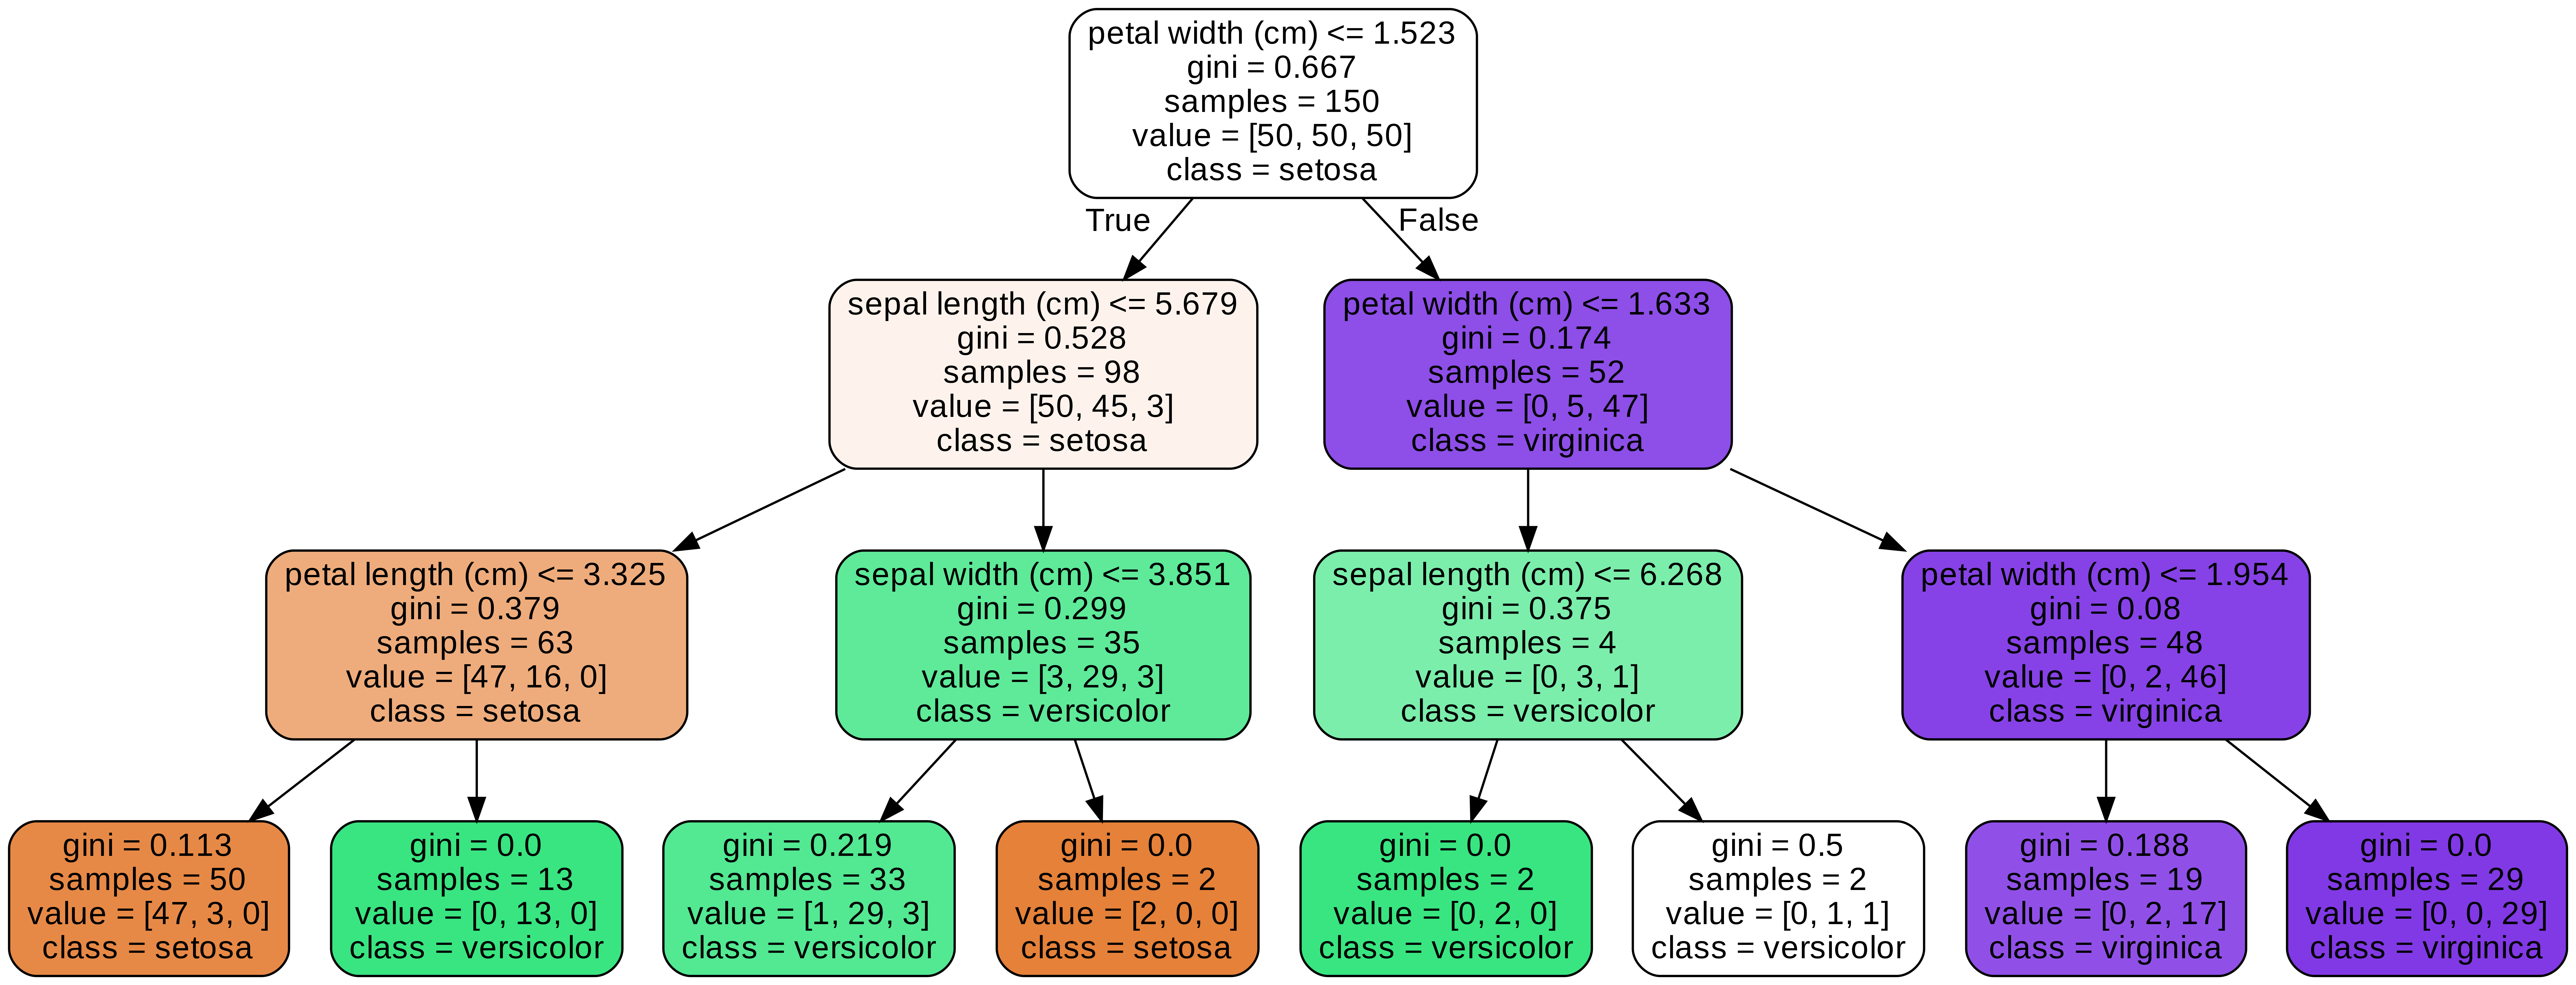

In [9]:
print('깊이3+랜덤 나무')
Image(filename = 'tree_3r.png', width = 700)


깊이무제한 나무


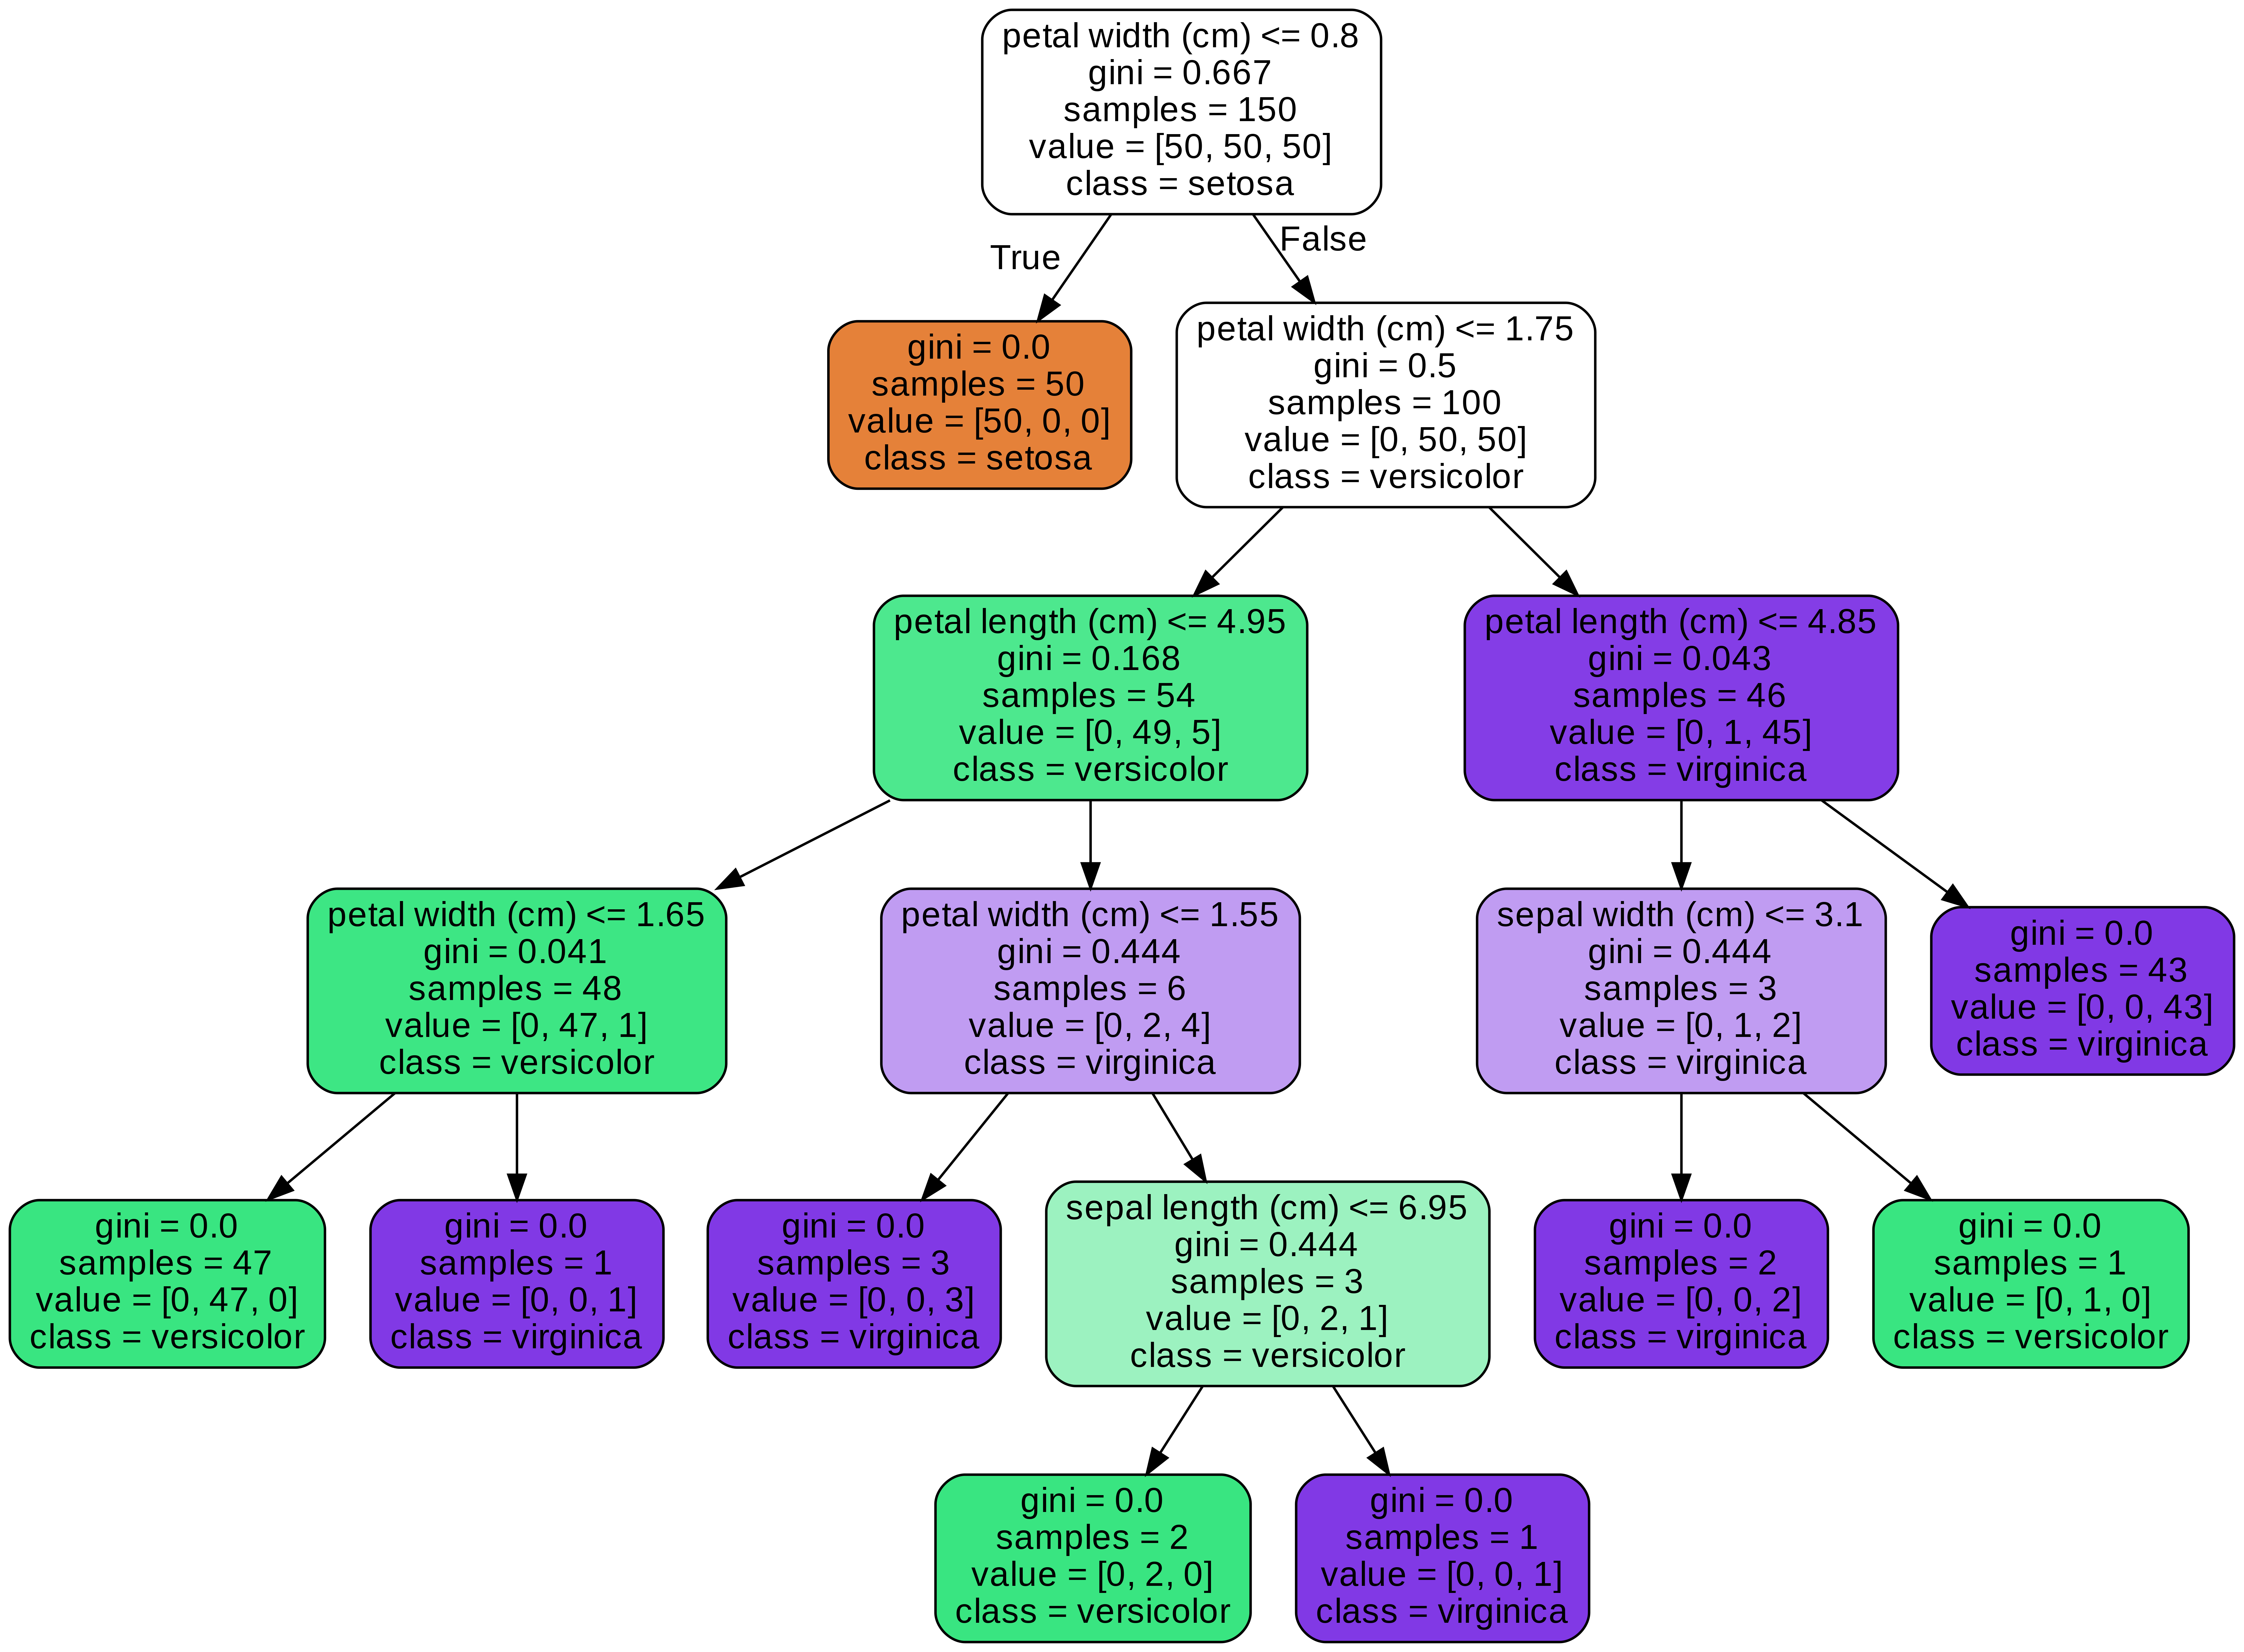

In [10]:
print('깊이무제한 나무')
Image(filename = 'tree_non.png', width = 700)


In [0]:
print('깊이무제한+랜덤 나무')
Image(filename = 'tree_nonr.png', width = 700)

{'sepal length (cm)': 0.0, 'sepal width (cm)': 0.0, 'petal length (cm)': 0.053936331199339015, 'petal width (cm)': 0.946063668800661}


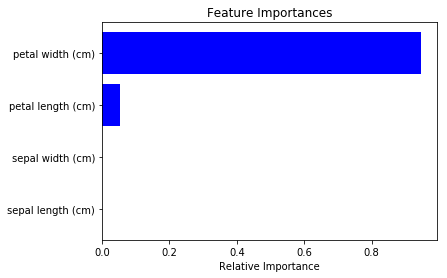

In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Bonus

fi = {}
for i in range(len(iris.feature_names)) :
    fi[iris.feature_names[i]] = DT_cf_max3.feature_importances_[i]


print(fi)

features = iris['feature_names']
importances = DT_cf_max3.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Now your turn!

In [12]:
import tensorflow as tf
import random as rd
import matplotlib.pyplot as plt

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


id = 8434
다음 그림은 숫자 4 입니다.


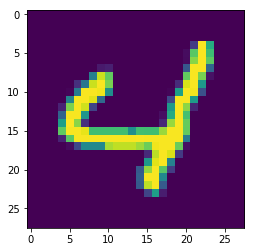

In [13]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y[id]))
plt.imshow(test_x[id])
plt.show()

In [14]:
# reshape!
train_x_flatten = train_x.reshape([train_x.shape[0],-1])
test_x_flatten = test_x.reshape([test_x.shape[0],-1])

print(train_x_flatten.shape, train_y.shape)

(60000, 784) (60000,)


**Q1. Decision Tree를 2개 선언하시오.**

1. max_depth를 3으로 설정
2. max_depth를 None으로 설정

In [0]:
## Your Code
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=8)


**Q2. Decision Tree를 각각 학습 시키시오.**
1. 실행 시간도 각각 구하시오.
2. train_x_flatten 과 train_y를 이용합니다.

In [18]:
## Your Code
import time

t1 = time.clock()
tree.fit(train_x_flatten, train_y)
t2 = time.clock()

print(t2 - t1)

13.119851


**Q3. export_graphviz를 이용하여 그래프를 저장합니다.**

* 다음의 코드를 수정하여 사용하세요.
```
export_graphviz( 여러분의모델, out_file = '파일명.dot', rounded = True, proportion = False,
               precision = 3, filled = True)
```
* 두 모델 전부 저장하세요

In [0]:
## Your Code
export_graphviz(tree, out_file = 'mt8.dot', rounded = False, proportion = False,
             precision = 3, filled = True)

**Q4. !dot 명령어를 사용하여 png 파일로 바꾸어봅시다!**

둘 다 바꾸세요.

!dot -Tpng 파일명.dot -o 파일명.png -Gdpi=600

In [20]:
## Your Code
!dot -Tpng mt8.dot -o mt8.png -Gdpi=600

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0626062 to fit


**Q5. 저장한 그래프파일을 불러오세요.**

* 둘 다 각각 합니다.
* 관찰하기 어렵다면 다운로드 받아서 관찰합니다.
* Discussion :
    1. iris 데이터일 때 처럼, '이해'를 하는데 도움이 되나요?
    2. 성능은 어떤가요?

In [0]:
## Your Code


**Q6. 성능을 봅시다.**

* 두 모델 전부 각각 시행합니다.
* 아래의 코드를 완성시켜 시각화 하면 됩니다.

```
from sklearn import metrics

predicted_y = 여러분의모델.predict(test_x_flatten)

print("Classification report for classifier {} : \n {}\n".format(여러분의모델, metrics.classification_report(test_y, predicted_y)))

print("Classification accuracy : {}".format(metrics.accuracy_score(test_y,predicted_y)))

print("Confusion matrix : \n{}".format(metrics.confusion_matrix(test_y, predicted_y).transpose()))
```
* 성능에 대하여 고민해봅시다.
* 참고
    1. Precision : 2라고 예측한 것 중 정말 2인 비율
    2. Recall : 정말 2 중에서 2라고 예측한 것의 비율
    3. [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)


In [21]:
from sklearn import metrics
from sklearn.metrics import classification_report ,confusion_matrix
 
predicted_y = tree.predict(test_x_flatten)
 
print("Classification report for classifier {} : \n {}\n".format(tree, metrics.classification_report(test_y, predicted_y)))
 
print("Classification accuracy : {}".format(metrics.accuracy_score(test_y,predicted_y)))
 
print("Confusion matrix : \n{}".format(metrics.confusion_matrix(test_y, predicted_y).transpose()))

Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       980
           1       0.94      0.95      0.94      1135
           2       0.81      0.83      0.82      1032
           3       0.78      0.77      0.77      1010
           4       0.81      0.83      0.82       982
           5       0.76      0.79      0.77       892
           6       0.87      0.82      0.85       958
           7       0.90      0.84      0.87      1028
           8       0.79      0.79      0.79       974
           9 

## 3.Decision Tree   vs  Random Forest


### 랜덤 포레스트 퀵 리뷰

![이미지](https://cdn-images-1.medium.com/max/800/1*i0o8mjFfCn-uD79-F1Cqkw.png)

1. 나무를 몇개 만들까? : n_estimators
2. 데이터들 부트스트래핑 해야지 : bootstrap = True
3. Feature는 얼마나 사용해야할까? : max_features = 'auto'

**Discussion**
1. 10개를 만들면, 10개의 서로 다른 나무가 나올 것이다. 우리는 과연 한 그루 나무일 때 처럼, 데이터를 편리하게 해석할 수 있는가?
2. 1번에서 그렇지 않다고 대답했다면 random forest는 언제 쓰는가?
3. 1번에서 그렇다고 대답했다면, 어떤 상황에서 그럴까?

**하지만, 우리는 일단 코드로 사용할 수는 있어야 한다!**

In [0]:
# 사용할 것 불러오고!
from sklearn.ensemble import RandomForestClassifier

In [0]:
# 사용할 모델 선언하고!
rfc_mnist = RandomForestClassifier(n_estimators = 20)

In [0]:
# 학습을 시킨다!
t1 = time.clock()
rfc_mnist.fit(train_x_flatten, train_y)
t2 = time.clock()

print("랜덤숲(20개 나무) 생성 시간 : ", t2-t1)

In [0]:
# 예측값도 뽑아둔다!
predicted_y = rfc_mnist.predict(test_x_flatten)

In [0]:
# 평가를 해본다!
from sklearn import metrics

print("Classification report for classifier {} : \n {}\n".format(rfc_mnist, metrics.classification_report(test_y, predicted_y)))
print("Classification accuracy : {}".format(metrics.accuracy_score(test_y,predicted_y)))
print("Confusion matrix : \n{}".format(metrics.confusion_matrix(test_y, predicted_y).transpose()))

In [0]:
indices[:10]

In [0]:
## Bonus
features = ['{}pixel'.format(i) for i in range(train_x_flatten.shape[1])]
importances = rfc_mnist.feature_importances_
indices = np.argsort(importances)

indices = indices[-10:] # 상위 10개만 보자

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
# 시각화는 우리에게 무슨 의미를 주는가.

export_graphviz(rfc_mnist.estimators_[10], out_file = 'rfc_mnist.dot', rounded = True, proportion = False,
               precision = 3, filled = True)

!dot -Tsvg rfc_mnist.dot -o rfc_mnist.svg

print('다운받아서 보자.')

### Now, Your turn

Fashion Mnist 데이터 위에서 실습해보자.

Labels:

0 : T-shirt/top  
1 : Trouser  
2 : Pullover  
3 : Dress  
4 : Coat  
5 : Sandal  
6 : Shirt  
7 : Sneaker  
8 : Bag  
9 : Ankle boot

In [0]:
import tensorflow as tf
import random as rd
import matplotlib.pyplot as plt

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

labels = {0 : 'T-shirt/top',  
1 : 'Trouser'  ,
2 : 'Pullover'  ,
3 : 'Dress' , 
4 : 'Coat'  ,
5 : 'Sandal'  ,
6 : 'Shirt'  ,
7 : 'Sneaker'  ,
8 : 'Bag'  ,
9 : 'Ankle boot'}

In [0]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[test_y[id]]))
plt.imshow(test_x[id])
plt.show()

In [0]:
# reshape!
train_x_flatten = train_x.reshape([train_x.shape[0],-1])
test_x_flatten = test_x.reshape([test_x.shape[0],-1])

print(train_x_flatten.shape, train_y.shape)

**Random Forest를 이용하여 모델링하고 평가하시오.  평가는 테스트셋 위에서 이루어져야 합니다.**

In [0]:
## Your Code

##  4. Logistic Regression with Bagging

In [0]:
import tensorflow as tf
import random as rd
import matplotlib.pyplot as plt

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

labels = {0 : 'T-shirt/top',  
1 : 'Trouser'  ,
2 : 'Pullover'  ,
3 : 'Dress' , 
4 : 'Coat'  ,
5 : 'Sandal'  ,
6 : 'Shirt'  ,
7 : 'Sneaker'  ,
8 : 'Bag'  ,
9 : 'Ankle boot'}

In [0]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[test_y[id]]))
plt.imshow(test_x[id])
plt.show()

In [0]:
# reshape!
train_x_flatten = train_x.reshape([train_x.shape[0],-1])
test_x_flatten = test_x.reshape([test_x.shape[0],-1])

print(train_x_flatten.shape, train_y.shape)

### 로지스틱 리그레션 퀵 리뷰!

In [0]:
import time
# 라이브러리에서 불러오고!

# from sklearn.linear_model import LogisticRegression  # 너무너무 느리다.
from sklearn.neural_network import MLPClassifier # 히든레이어 없이 가면 로지스틱 리그레션!

# 선언한다!

lrc = MLPClassifier(hidden_layer_sizes =(), # 중요
                   solver = 'adam',
                   learning_rate = 'adaptive',
                   learning_rate_init = 0.005,
                   max_iter = 200,
                   verbose = True,
                   early_stopping = True,
                   n_iter_no_change = 10)

# 학습을 시킨다!
t1 = time.clock()
lrc.fit(train_x_flatten, train_y)
t2 = time.clock()

print('학습 소요시간 : {}'.format(t2-t1))
# 예측값 만들어둔다!

predicted_y = lrc.predict(test_x_flatten)

In [0]:
# 평가를 해본다!
from sklearn import metrics

print("Classification report for classifier {} : \n {}\n".format(lrc, metrics.classification_report(test_y, predicted_y)))
print("Classification accuracy : {}".format(metrics.accuracy_score(test_y,predicted_y)))
print("Confusion matrix : \n{}".format(metrics.confusion_matrix(test_y, predicted_y).transpose()))

### Bagging!!

우리는, 일종의 랜덤 로지스틱 숲을 만들어볼까 합니다. (그런 이름 없어요.)<br>
랜덤포레스트에서, 디시전나무들을 전부 로지스틱 리그레션으로 갈아치울겁니다.

**주의사항**
1. 실습 시점에, 혹시 local 아나콘다에서 실행중이신 분들은 노트북이 멈출 수 있습니다.


**1. 루프를 돌리기 위한 최초의 시도를 진행합니다.**

1. train_x_flatten을 부트스트래핑하여 샘플셋을 만드세요. 샘플사이즈는 원본 데이터 사이즈와 동일한 것을 권장합니다.

np.random.choice를 이용합니다.

In [0]:
import numpy as np

In [0]:
boot_idx = np.random.choice(train_x_flatten.shape[0], size = train_x_flatten.shape[0], replace = True)
boot_sample = train_x_flatten[boot_idx]
boot_y = train_y[boot_idx]

**2. 로지스틱 리그레션에 활용할 feature(n번째 위치의 픽셀)들을 샘플링 하세요.**

1. boot_sample.shape를 통해서 몇 개의 feature들이 있는지 확인하세요. (픽셀의 수입니다.)
2. sqaure root를 씌우고 반올림한 숫자만큼의 feature들을 샘플링하여 사용할 겁니다. np.sqrt()를 활용해보세요.
3. 비복원 추출입니다. 같은 feature를 여러 개 쓸 이유 없습니다.
3. feature들의 인덱스는 매우 중요합니다. 기록해둬야 합니다.

In [0]:
feature_idx = np.random.choice(train_x_flatten.shape[1],
                               size = np.int(np.sqrt(train_x_flatten.shape[1])),
                              replace = False ) # 비복원 추출입니다! 중요!

boot_x = boot_sample[:, feature_idx]

**3. 최초의 로지스틱 리그레션을 만들어봅니다.**

1. 성능이 아마 매우 안좋을 거에요.

In [0]:
import time
# 라이브러리에서 불러오고!

# from sklearn.linear_model import LogisticRegression  # 너무너무 느리다.
from sklearn.neural_network import MLPClassifier # 히든레이어 없이 가면 로지스틱 리그레션!

# 선언한다!

lrc1 = MLPClassifier(hidden_layer_sizes =(), # 중요
                   solver = 'adam',
                   learning_rate = 'adaptive',
                   learning_rate_init = 0.005,
                   max_iter = 200,
                   verbose = True,
                   early_stopping = True,
                   n_iter_no_change = 10)

# 학습을 시킨다!
t1 = time.clock()
lrc1.fit(boot_x, boot_y )
t2 = time.clock()

print('학습 소요시간 : {}'.format(t2-t1))


#### 실습1

이제 루프를 돌려서, 로지스틱 리그레션을 여러개 만들어둬야 합니다.
* 30개의 로지스틱 리그레션을 만들어야 합니다.
* 루프를 돌리세요!

**hint**
* 빈 리스트 random_logistic_forests를 만듭니다.
* 리스트의 원소로 딕셔너리를 담습니다.
    * 딕셔너리 안에는 만들어진 모델과
    * feature idx가 담겨있어야만 합니다.
    * 다음과 같은 구조여야 합니다. { 'model' : 만든 모델,  'feature_idx' : 인덱스}
    
    
    


In [0]:
random_logistic_forests = []

for i in range(30) :
    model = {}
    boot_idx = np.random.choice(train_x_flatten.shape[0], size = train_x_flatten.shape[0], replace = True)
    boot_sample = train_x_flatten[boot_idx]
    boot_y = train_y[boot_idx]
    
    feature_idx = np.random.choice(train_x_flatten.shape[1],
                                   size = np.int(np.sqrt(train_x_flatten.shape[1])),
                              replace = False ) # 비복원 추출입니다! 중요!

    boot_x = boot_sample[:, feature_idx]

    lrc = MLPClassifier(hidden_layer_sizes =(), # 중요
               solver = 'adam',
               learning_rate = 'adaptive',
               learning_rate_init = 0.005,
               max_iter = 200,
               verbose = True,
               early_stopping = True,
               n_iter_no_change = 10)

    
    print('{}번째 모델 생성 시작'.format(i+1))
    t1 = time.clock()
    lrc.fit(boot_x, boot_y )
    t2 = time.clock()
    print('모델 생성 소요 시간 : {:.4f}'.format(t2-t1))
    
    model['model'] = lrc
    model['feature_idx'] = feature_idx
    
    random_logistic_forests.append(model)
    



**예측을 위한 최초의 시도**

이제 예측값을 만들어 볼께요!

루프 돌리기 전에 최초의 예측값을 만들어 봅시다.

In [0]:
random_logistic_forests[0]

In [0]:
model = random_logistic_forests[0]['model']
feature_idx = random_logistic_forests[0]['feature_idx']

In [0]:
predicted_y = model.predict(test_x_flatten[:,feature_idx])

In [0]:
## 하나만 평가해볼까요?

# 평가를 해본다!
from sklearn import metrics

print("Classification report for classifier {} : \n {}\n".format(model, metrics.classification_report(test_y, predicted_y)))
print("Classification accuracy : {}".format(metrics.accuracy_score(test_y,predicted_y)))
print("Confusion matrix : \n{}".format(metrics.confusion_matrix(test_y, predicted_y).transpose()))

####실습2

이제, 루프를 돌려서 결과값을 뽑아봅시다.<br>

**hint**
* 빈 리스트 predicted_raw 생성합니다.
* 빈 리스트에, 각 모델별 예측값 어레이를 담아두면 됩니다.

In [0]:
predicted_raw = []

for i in range(30) :
    temp_dict = random_logistic_forests[i]
    model = temp_dict['model']
    feature_idx = temp_dict['feature_idx']
    
    predicted_y = model.predict(test_x_flatten[:,feature_idx])
    predicted_raw.append(predicted_y)
    

**이제 투표된 예측값을 뽑아볼께요**

In [0]:
predicted_y = []
for i in range(len(predicted_raw[0])):
    temp_predicted = [py[i] for py in predicted_raw]
    predicted_y.append(max(set(temp_predicted), key=temp_predicted.count))
    
predicted_y = np.array(predicted_y)

In [0]:
## 평가합시다.

In [0]:
from sklearn import metrics

print("Classification report for classifier {} : \n {}\n".format('random_logistic_forest', metrics.classification_report(test_y, predicted_y)))
print("Classification accuracy : {}".format(metrics.accuracy_score(test_y,predicted_y)))
print("Confusion matrix : \n{}".format(metrics.confusion_matrix(test_y, predicted_y).transpose()))

**Further more**

* 실습1의 feature수를 28개에서 200개로 올려서 실험해봅시다.
* 개수를 늘려보아도 좋아요.
